In [4]:
# RNN/LSTM Neural Network

# Import libraries and dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta


In [5]:
# Create DataFrame 
data = yf.download(tickers = 'ETH-USD',
                   start = '2012-03-11',
                   end = '2023-04-13'
)

data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000
2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984
2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016
2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,621732992


In [6]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

# checking the difference between the adj close pice or target price
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)
data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

# Chosing the data point to learn from
data['TargetNextClose'] = data['Adj Close'].shift(-1)

# Drop na, reset the index and drop Volume, Close, and Data since we wont be using that data. 
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [7]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,370.380005,393.058990,369.936005,385.313995,28.771504,458.208040,659.764133,726.411848,14.764984,1,400.507996
1,385.743011,402.589996,385.601990,400.507996,32.299154,452.712798,654.630348,722.095240,-2.330994,0,398.526001
2,400.856995,429.251007,390.609985,398.526001,32.077120,447.552150,649.558975,717.809555,14.832001,1,414.243011
3,399.411011,415.888000,393.878998,414.243011,35.825328,444.379851,644.899253,713.788806,15.516022,1,430.540009
4,415.023987,430.540009,412.471008,430.540009,39.532403,443.061771,640.654516,710.037166,62.779999,1,492.941010
5,430.161011,493.058014,417.412994,492.941010,51.116822,447.812175,637.729496,707.161721,-0.425018,0,492.734985
6,493.160004,526.469971,482.658997,492.734985,51.082203,452.090538,634.858317,704.321631,8.898010,1,501.477997
7,492.579987,512.023987,488.278992,501.477997,52.543534,456.794105,632.217123,701.634961,28.822021,1,531.702026
8,502.880005,531.702026,502.880005,531.702026,57.271300,463.928193,630.226725,699.384193,-20.926971,0,511.147003
9,532.073975,534.197021,500.250000,511.147003,53.395228,468.425222,627.868710,696.890986,-8.250977,0,502.894012


In [8]:
# Import minmaxscaler rom slearn
from sklearn.preprocessing import MinMaxScaler

# Set the MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform data
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.06054019 0.0640227  0.06194027 ... 0.63913884 1.         0.06688123]
 [0.06379107 0.06600569 0.06532005 ... 0.62747427 0.         0.06646201]
 [0.06698926 0.07155272 0.06640048 ... 0.63918457 1.         0.06978641]
 ...
 [0.37356547 0.37194757 0.37665402 ... 0.66418012 1.         0.38641806]
 [0.37569611 0.38115262 0.38085321 ... 0.61597401 0.         0.38239549]
 [0.38662225 0.38519479 0.38913115 ... 0.64866881 1.         0.38842209]]


In [9]:
# Multiple feature from data provided to the model
X = []
# print(data_set_scaled[0].size)
# data_set_scaled=data_set.values


backcandles = 300

print(data_set_scaled.shape[0])
for j in range(8):# data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):# backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

# Move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Erase first elements of y because of backcandles to match X length
# del(yi[0:backcandles])
# X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1]) # chose -3 so we can determine the distance between each candle to get


y=np.reshape(yi,(len(yi),1))
# y=sc.fit_transform(yi)
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

1831
[[[0.06054019 0.0640227  0.06194027 ... 0.08127897 0.13684239 0.15942118]
  [0.06379107 0.06600569 0.06532005 ... 0.08002675 0.13549156 0.15820804]
  [0.06698926 0.07155272 0.06640048 ... 0.07885077 0.13415714 0.15700358]
  ...
  [0.00474889 0.00454045 0.00456707 ... 0.00411449 0.00344794 0.00915987]
  [0.00447068 0.00501632 0.00474928 ... 0.00388285 0.00321921 0.00885149]
  [0.00520994 0.00522549 0.00511206 ... 0.0036332  0.00298539 0.00854032]]

 [[0.06379107 0.06600569 0.06532005 ... 0.08002675 0.13549156 0.15820804]
  [0.06698926 0.07155272 0.06640048 ... 0.07885077 0.13415714 0.15700358]
  [0.06668329 0.06877245 0.06710573 ... 0.07812788 0.13293105 0.15587359]
  ...
  [0.00447068 0.00501632 0.00474928 ... 0.00388285 0.00321921 0.00885149]
  [0.00520994 0.00522549 0.00511206 ... 0.0036332  0.00298539 0.00854032]
  [0.00483898 0.0048469  0.00479301 ... 0.00341924 0.00275907 0.00823531]]

 [[0.06698926 0.07155272 0.06640048 ... 0.07885077 0.13415714 0.15700358]
  [0.06668329 0.0

In [10]:
# Split data into train test sets

splitlimit = int(len(X)*0.8)
print(splitlimit)

# Set Train and test data
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1224
(1224, 300, 8)
(307, 300, 8)
(1224, 1)
(307, 1)
[[0.00552521]
 [0.00490386]
 [0.00497344]
 ...
 [0.36586736]
 [0.36153634]
 [0.36074396]]


In [11]:
# Import libraries and dependencies

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Input
from keras.layers import Activation
from keras.layers import concatenate
import tensorflow as tf
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
import numpy as np


In [12]:

#tf.random.set_seed(20)
np.random.seed(10)

# Set the models settings
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=20, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
56/56 [==============================] - 8s 120ms/step - loss: 0.0055 - val_loss: 0.0045
Epoch 2/30
56/56 [==============================] - 7s 118ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 3/30
56/56 [==============================] - 6s 116ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/30
56/56 [==============================] - 6s 115ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 5/30
56/56 [==============================] - 6s 110ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 6/30
56/56 [==============================] - 6s 111ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 7/30
56/56 [==============================] - 6s 110ms/step - loss: 9.1690e-04 - val_loss: 0.0022
Epoch 8/30
56/56 [==============================] - 6s 114ms/step - loss: 8.8026e-04 - val_loss: 0.0079
Epoch 9/30
56/56 [==============================] - 6s 111ms/step - loss: 9.9498e-04 - val_loss: 0.0056
Epoch 10/30
56/56 [==============================] - 6s 111ms/step - loss: 0.0010 - val_

In [13]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

10/10 [==============================] - 1s 45ms/step
[0.37752333] [0.33435021]
[0.37579095] [0.30571546]
[0.35814768] [0.2878536]
[0.3337381] [0.23695575]
[0.31364074] [0.2384533]
[0.28090724] [0.24301011]
[0.26270896] [0.20800938]
[0.25588858] [0.21198346]
[0.24085924] [0.19233735]
[0.23323055] [0.22068463]


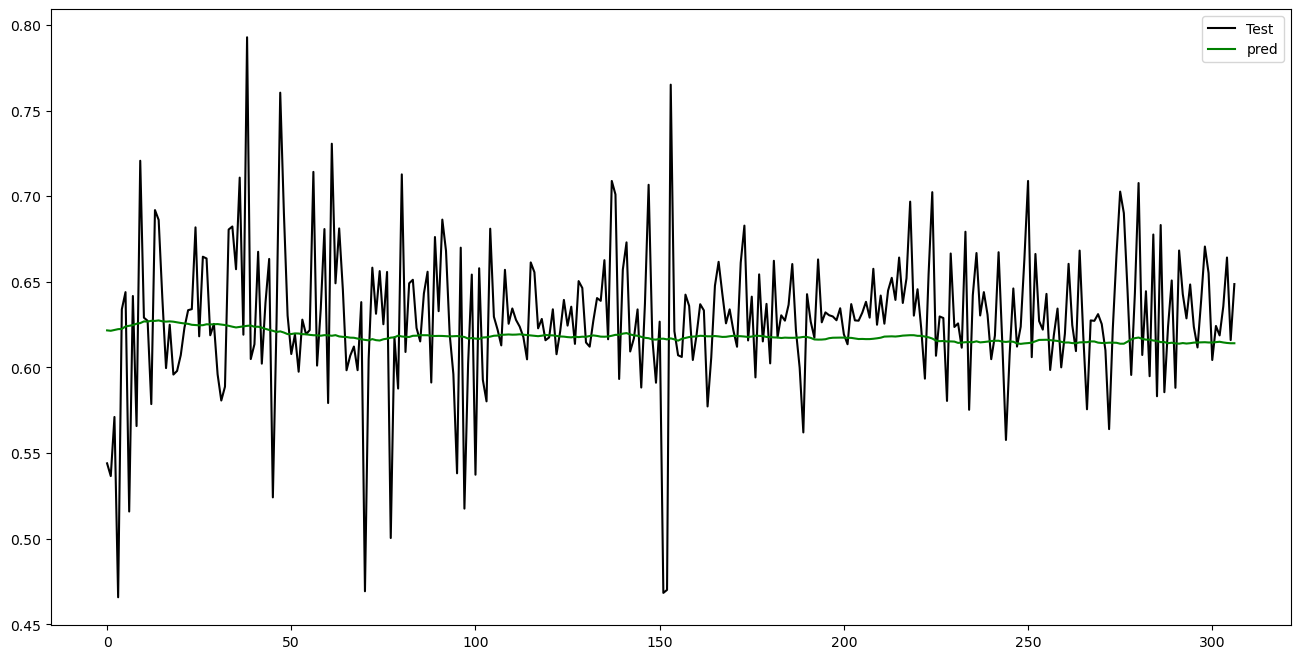

In [35]:
# Plot the data from the LSTM model

plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

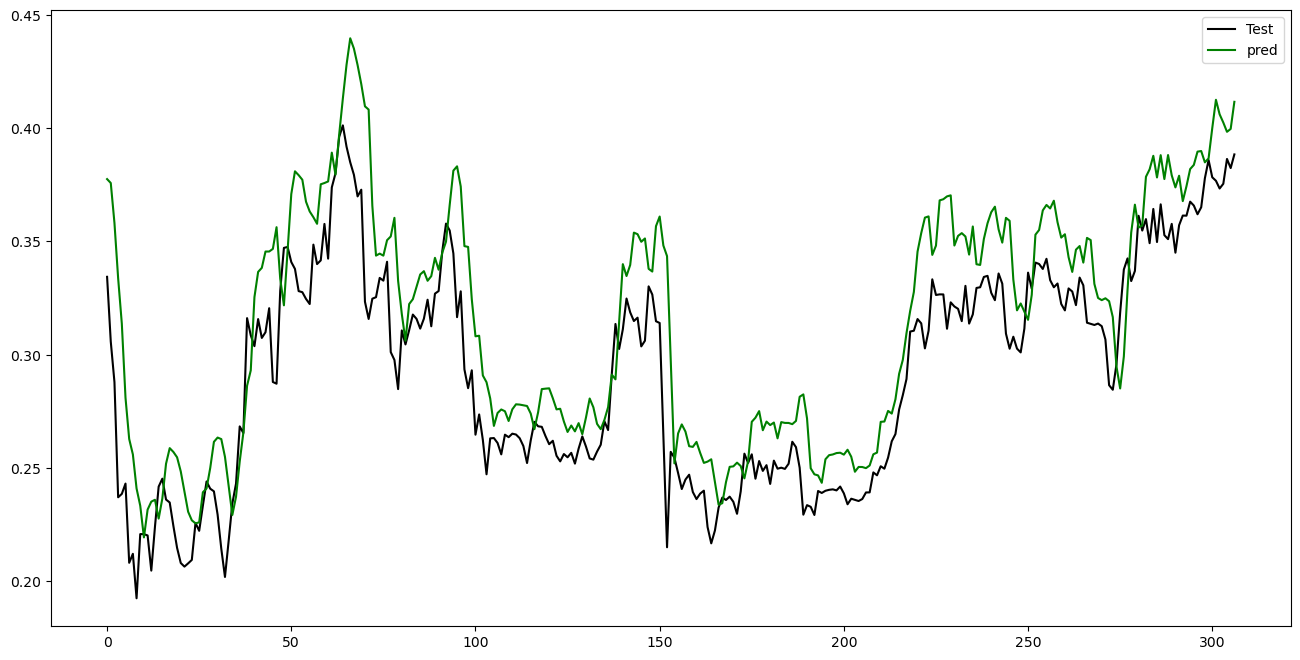

In [14]:
# Plot the data from the LSTM model v2

plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
# Usually the training model predicts the graph exactly the same but that doesn't really help us with what we are looking for.
# What were looking to find is the distance between the two candles. 
# We are using 6 years of trading data to determine what the closing price. 
# With the two graphs we can see that they are two completely different sets. The only difference 
# between the two is the data set points the LSTM model was trained on. The first one was trained
# on the distance between the closing bars and the second model was trained on the actual closing prices.
